In [2]:
train_path = "./CMAPSSData/train_FD001.txt"

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [4]:
train_data = pd.read_csv(train_path, delim_whitespace=True, header=None)

C:\Users\tanbi\AppData\Local\Temp\ipykernel_28596\528830271.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv(train_path, delim_whitespace=True, header=None)


In [5]:
train_data

0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...      16       17       18      19    20   21    22     23  \
0      14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1      14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2      14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3      14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4      14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   
...      ...  ...     ...      ...      ...     ...   ...  ...   ...    ...   
20626  14.62  ...  519.49  2388.26  8137.60  8.4956  0.03  397  2388  100.0   
20627  14.62  ...  519.68  2388.22  8136.50  8.5139  0.03  395  2388  100.0   
20628  14.62  ...  520.01  2388.24  8141.05  8.5646  0.03  398  2388  100.0   
20629  14.62  ...  519.67  2388.23  8139.29  8.5389  0.03  395  2388  100.0   
20630  14.62  ...  519.30  2388.26  8137.33  8.5036  0.03  396  2388  100.0   

          24       25  
0      39.06  23.4190  
1      39.00  23.4236  
2      38.95  23.3442  
3      38.88  23.3739  
4      38.90  23.4044  
...      ...      ...  
20626  38.49  22.9735  
20627  38.30  23.1594  
20628  38.44  22.9333  
20629  38.29  23.0640  
20630  38.37  23.0522  

[20631 rows x 26 columns]

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

# Columns
1)	unit number
2)	time, in cycles
3)	operational setting 1
4)	operational setting 2
5)	operational setting 3
6)	sensor measurement  1
7)	sensor measurement  2
...
26)	sensor measurement  26

In [7]:
pd.set_option('display.max_columns', None)
print(train_data.describe())

                 0             1             2             3        4   \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

                 5             6             7             8             9   \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+

## col-4, col-3, col-22, col-23, col-20, col-19, col-14, col-9, col-5 

In [13]:
train_data = train_data.drop([4, 3, 22, 23, 20, 19, 14, 9, 5], axis=1)
train_data

0    1       2       6        7        8      10      11       12  \
0        1    1 -0.0007  641.82  1589.70  1400.60  21.61  554.36  2388.06   
1        1    2  0.0019  642.15  1591.82  1403.14  21.61  553.75  2388.04   
2        1    3 -0.0043  642.35  1587.99  1404.20  21.61  554.26  2388.08   
3        1    4  0.0007  642.35  1582.79  1401.87  21.61  554.45  2388.11   
4        1    5 -0.0019  642.37  1582.85  1406.22  21.61  554.00  2388.06   
...    ...  ...     ...     ...      ...      ...    ...     ...      ...   
20626  100  196 -0.0004  643.49  1597.98  1428.63  21.61  551.43  2388.19   
20627  100  197 -0.0016  643.54  1604.50  1433.58  21.61  550.86  2388.23   
20628  100  198  0.0004  643.42  1602.46  1428.18  21.61  550.94  2388.24   
20629  100  199 -0.0011  643.23  1605.26  1426.53  21.61  550.68  2388.25   
20630  100  200 -0.0032  643.85  1600.38  1432.14  21.61  550.79  2388.26   

            13     15      16       17       18   21     24       25  
0      9046.19  47.47  521.66  2388.02  8138.62  392  39.06  23.4190  
1      9044.07  47.49  522.28  2388.07  8131.49  392  39.00  23.4236  
2      9052.94  47.27  522.42  2388.03  8133.23  390  38.95  23.3442  
3      9049.48  47.13  522.86  2388.08  8133.83  392  38.88  23.3739  
4      9055.15  47.28  522.19  2388.04  8133.80  393  38.90  23.4044  
...        ...    ...     ...      ...      ...  ...    ...      ...  
20626  9065.52  48.07  519.49  2388.26  8137.60  397  38.49  22.9735  
20627  9065.11  48.04  519.68  2388.22  8136.50  395  38.30  23.1594  
20628  9065.90  48.09  520.01  2388.24  8141.05  398  38.44  22.9333  
20629  9073.72  48.39  519.67  2388.23  8139.29  395  38.29  23.0640  
20630  9061.48  48.20  519.30  2388.26  8137.33  396  38.37  23.0522  

[20631 rows x 17 columns]

In [ ]:
print(train_data.describe())

In [16]:
train_data.isnull().sum()

0     0
1     0
2     0
6     0
7     0
8     0
10    0
11    0
12    0
13    0
15    0
16    0
17    0
18    0
21    0
24    0
25    0
dtype: int64

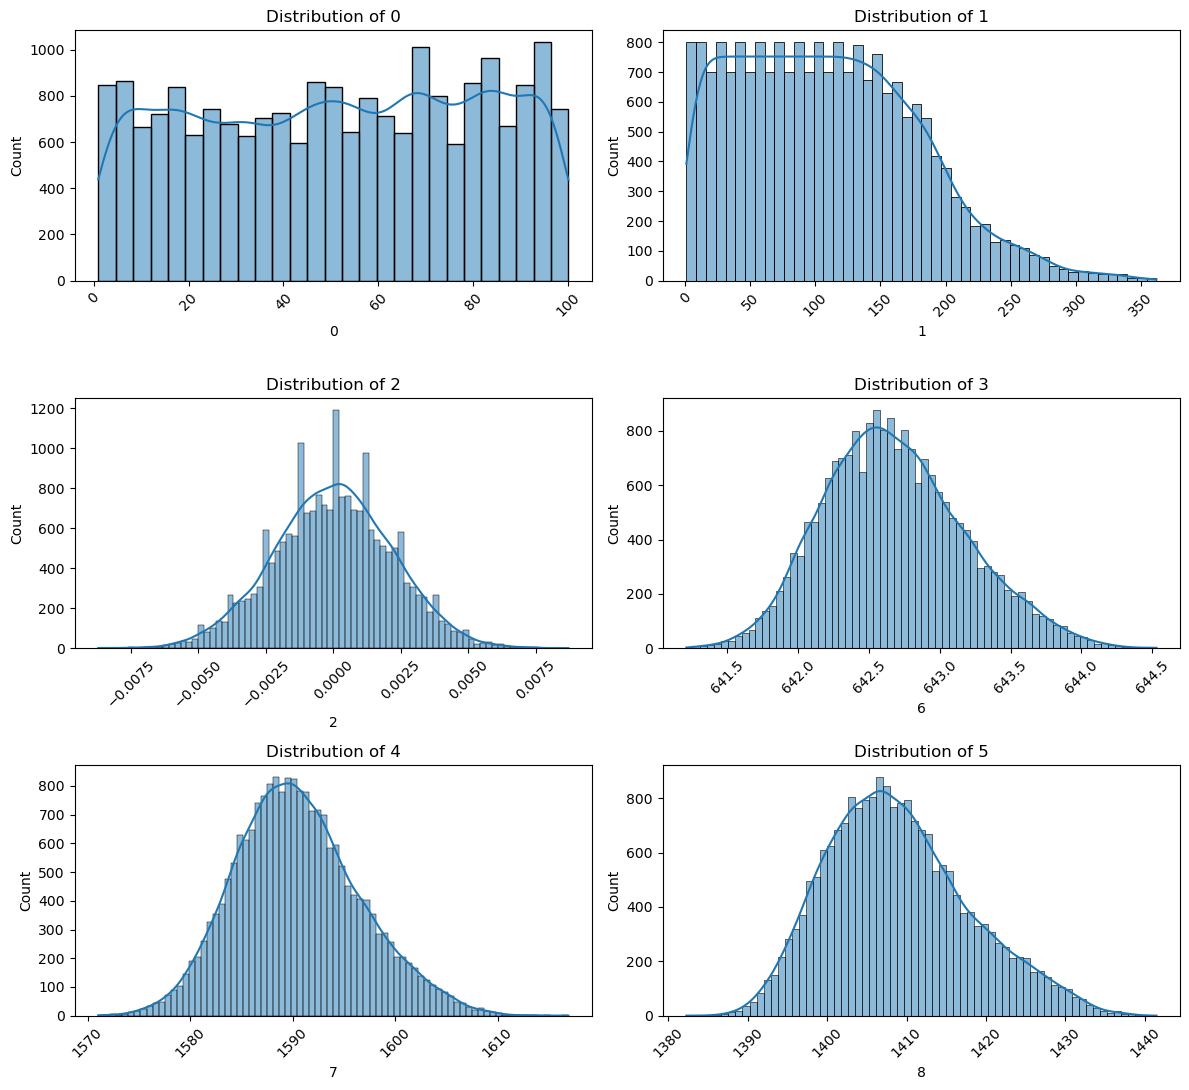

In [29]:
plt.figure(figsize=(12, 11))
for i, column in enumerate(train_data.columns):
    if(i >= 6):
        break
    plt.subplot(3, 2, i+1)
    sns.histplot(train_data[column], kde=True)
    plt.title(f"Distribution of {i}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [74]:
single_engine_data = train_data[train_data[0] == 2]

In [31]:
single_engine_data

0    1       2       6        7        8      10      11       12  \
0     1    1 -0.0007  641.82  1589.70  1400.60  21.61  554.36  2388.06   
1     1    2  0.0019  642.15  1591.82  1403.14  21.61  553.75  2388.04   
2     1    3 -0.0043  642.35  1587.99  1404.20  21.61  554.26  2388.08   
3     1    4  0.0007  642.35  1582.79  1401.87  21.61  554.45  2388.11   
4     1    5 -0.0019  642.37  1582.85  1406.22  21.61  554.00  2388.06   
..   ..  ...     ...     ...      ...      ...    ...     ...      ...   
187   1  188 -0.0067  643.75  1602.38  1422.78  21.61  551.94  2388.31   
188   1  189 -0.0006  644.18  1596.17  1428.01  21.61  550.70  2388.27   
189   1  190 -0.0027  643.64  1599.22  1425.95  21.61  551.29  2388.29   
190   1  191 -0.0000  643.34  1602.36  1425.77  21.61  550.92  2388.28   
191   1  192  0.0009  643.54  1601.41  1427.20  21.61  551.25  2388.32   

          13     15      16       17       18   21     24       25  
0    9046.19  47.47  521.66  2388.02  8138.62  392  39.06  23.4190  
1    9044.07  47.49  522.28  2388.07  8131.49  392  39.00  23.4236  
2    9052.94  47.27  522.42  2388.03  8133.23  390  38.95  23.3442  
3    9049.48  47.13  522.86  2388.08  8133.83  392  38.88  23.3739  
4    9055.15  47.28  522.19  2388.04  8133.80  393  38.90  23.4044  
..       ...    ...     ...      ...      ...  ...    ...      ...  
187  9037.91  48.00  519.79  2388.23  8117.69  396  38.51  22.9588  
188  9044.55  48.08  519.58  2388.33  8117.51  395  38.48  23.1127  
189  9040.58  48.33  520.04  2388.35  8112.58  398  38.49  23.0675  
190  9042.76  48.15  519.57  2388.30  8114.61  394  38.45  23.1295  
191  9033.22  48.25  520.08  2388.32  8110.93  396  38.48  22.9649  

[192 rows x 17 columns]

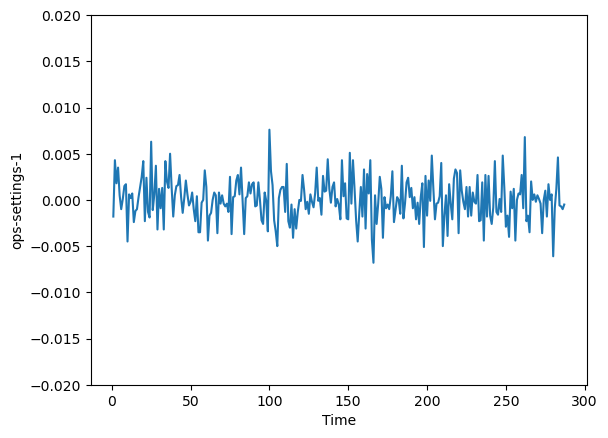

In [75]:
sns.lineplot(data=single_engine_data, x=single_engine_data[1], y=single_engine_data[2])
plt.xlabel("Time")
plt.ylabel("ops-settings-1")
plt.ylim(-0.02, 0.02)
plt.show()

In [72]:
def plot_smoothed_trend(single_engine_data, x_col, y_col, frac=0.5, window=10, show_rolling=False):
    y = single_engine_data[y_col]
    x = single_engine_data[x_col]

    # LOWESS
    lowess = sm.nonparametric.lowess
    smoothed = lowess(y, x, frac=frac)

    # Rolling average
    rolling_avg = y.rolling(window=window, center=True).mean()

    plt.figure(figsize=(10, 4))
    sns.lineplot(x=x, y=y, label='Original', color='blue')

    # Smoothed trend
    plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='Smooth Trend')

    # Rolling average (optional)
    if show_rolling:
        plt.plot(x, rolling_avg, color='green', label='Rolling Avg', linestyle='--')

    plt.legend()
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Column: {y_col}')
    plt.tight_layout()
    plt.show()


In [70]:
single_engine_data.columns

Index([0, 1, 2, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 21, 24, 25], dtype='int64')

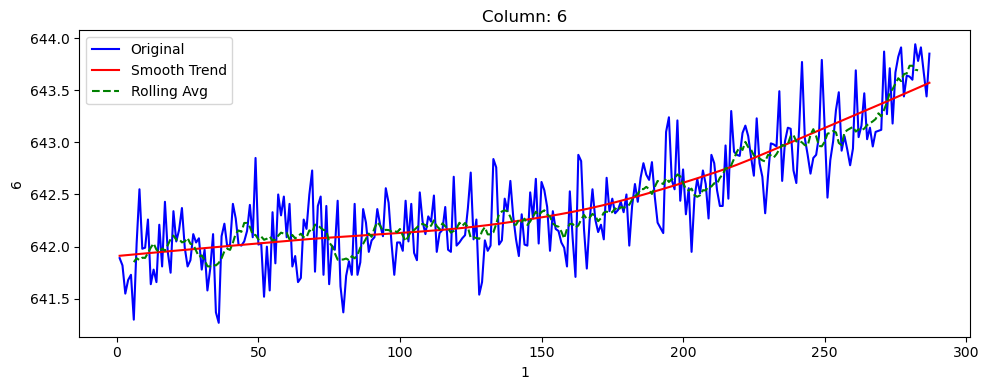

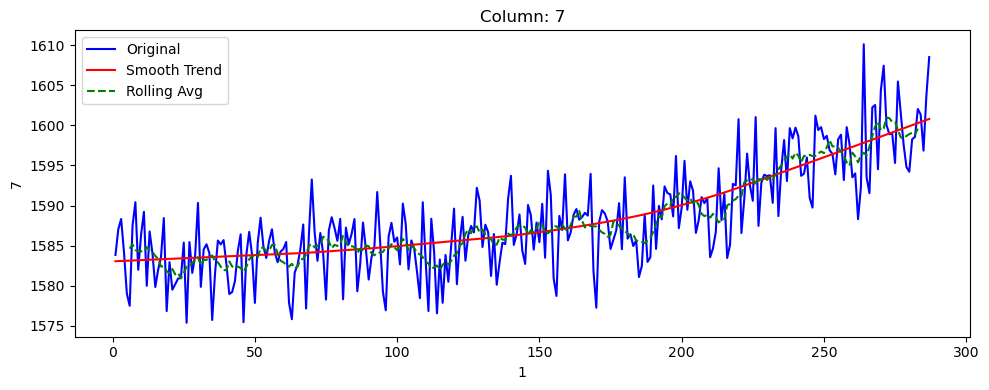

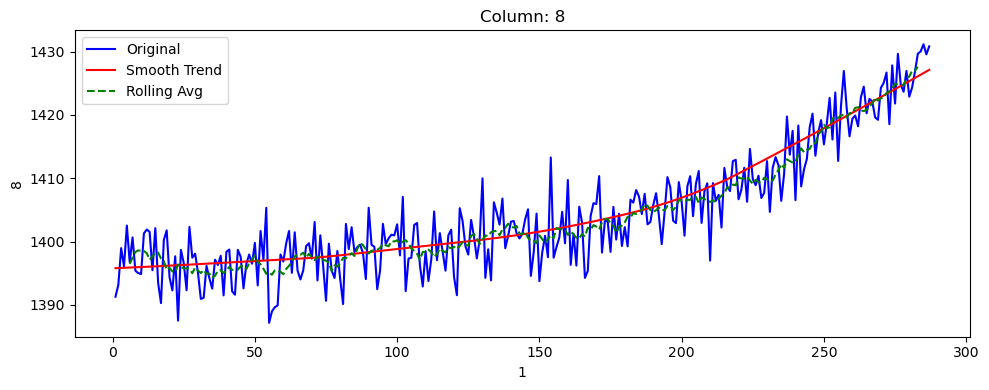

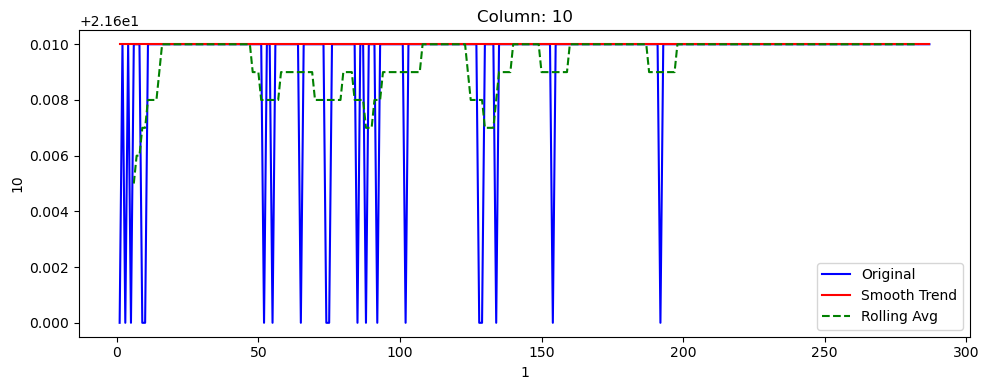

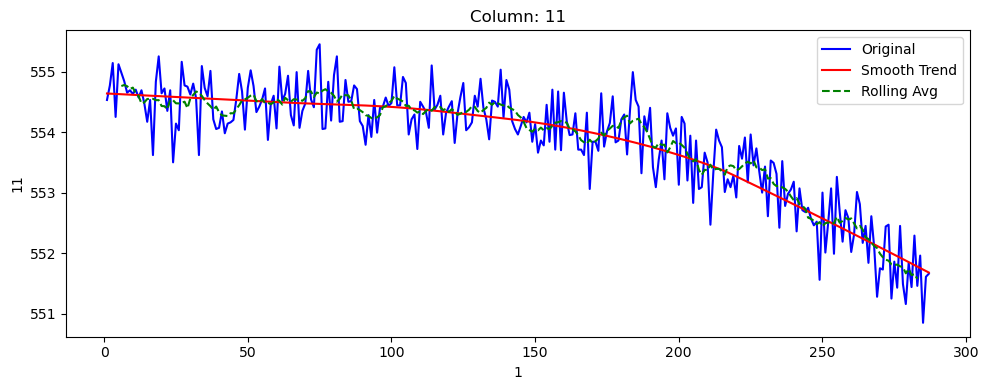

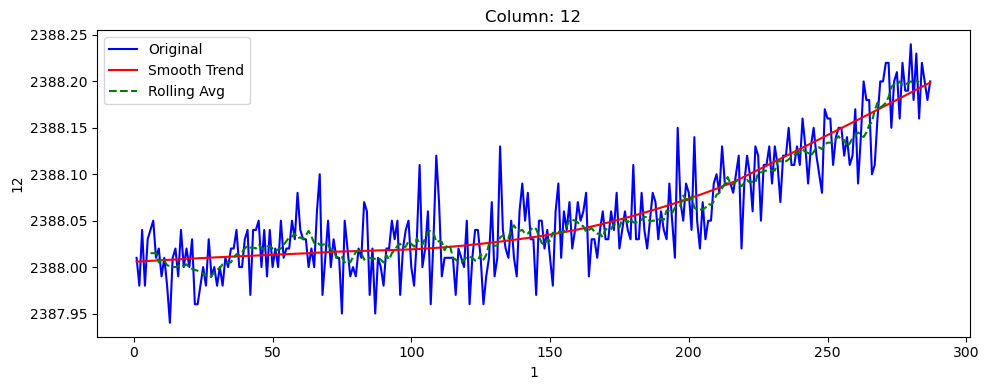

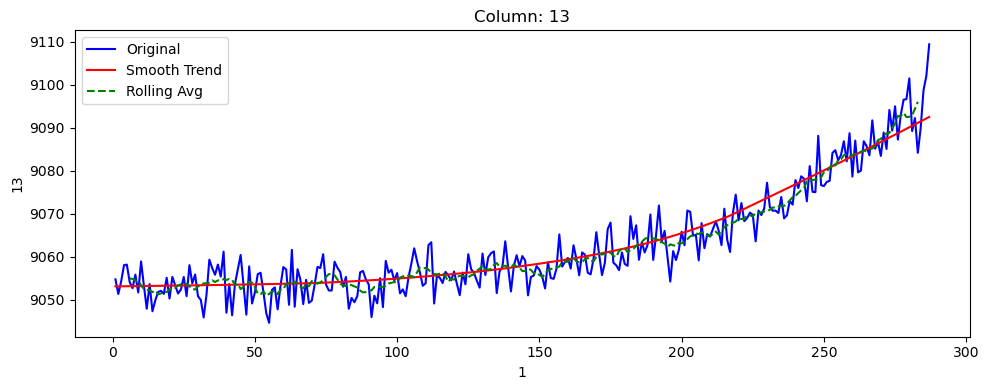

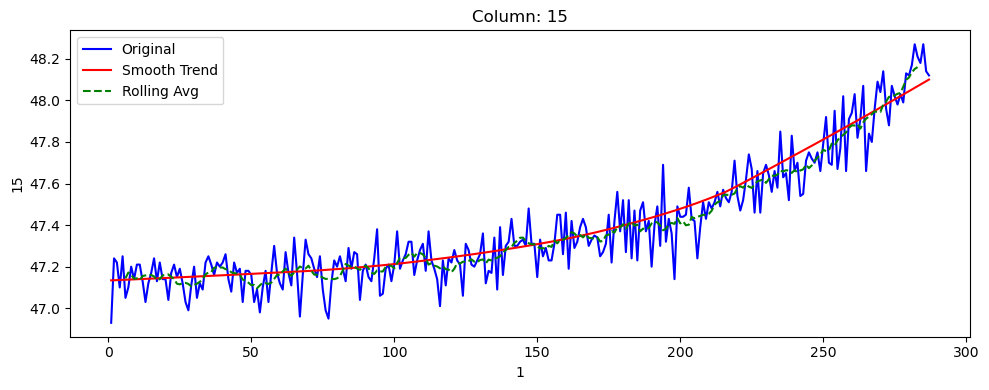

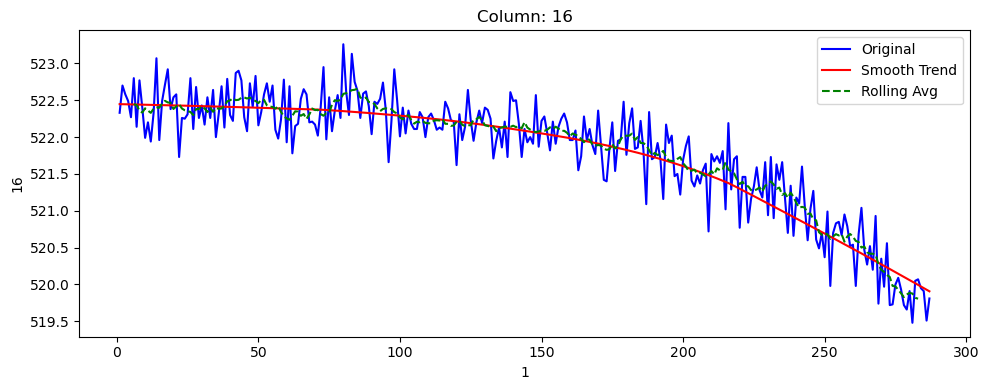

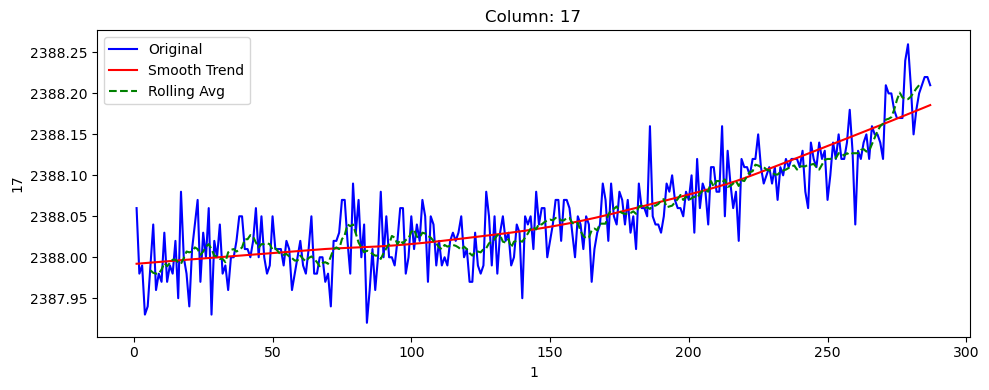

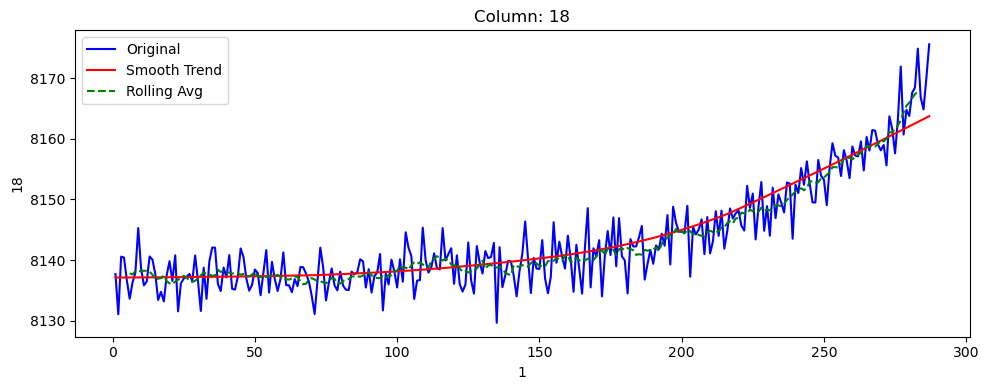

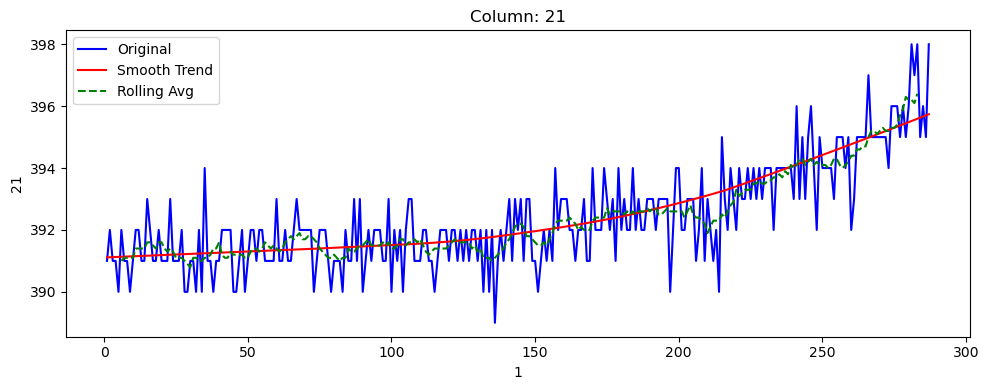

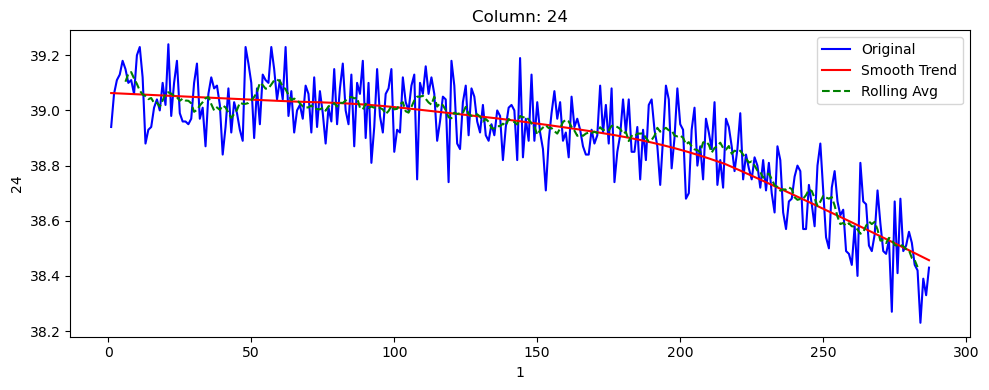

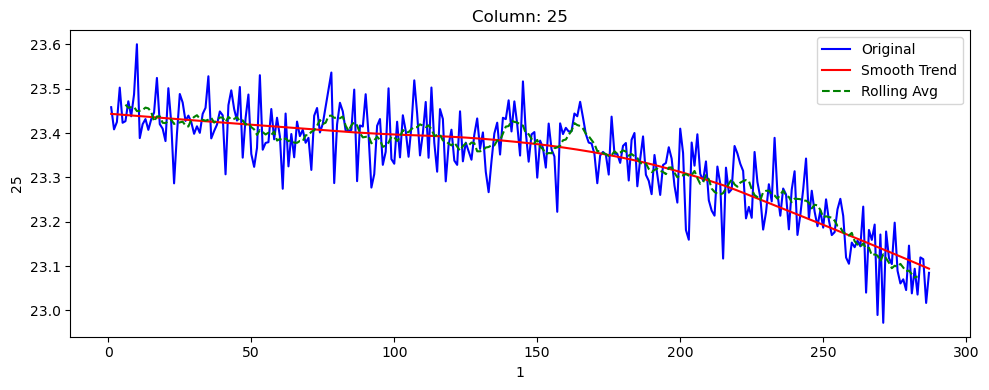

In [76]:
for col_idx in single_engine_data.columns[3:]:
    plot_smoothed_trend(single_engine_data, x_col=1, y_col=col_idx, frac=0.5, window=10, show_rolling=True)

In [77]:
train_data = train_data.drop([10], axis=1)

In [78]:
train_data

0    1       2       6        7        8       11       12       13  \
0        1    1 -0.0007  641.82  1589.70  1400.60  554.36  2388.06  9046.19   
1        1    2  0.0019  642.15  1591.82  1403.14  553.75  2388.04  9044.07   
2        1    3 -0.0043  642.35  1587.99  1404.20  554.26  2388.08  9052.94   
3        1    4  0.0007  642.35  1582.79  1401.87  554.45  2388.11  9049.48   
4        1    5 -0.0019  642.37  1582.85  1406.22  554.00  2388.06  9055.15   
...    ...  ...     ...     ...      ...      ...     ...      ...      ...   
20626  100  196 -0.0004  643.49  1597.98  1428.63  551.43  2388.19  9065.52   
20627  100  197 -0.0016  643.54  1604.50  1433.58  550.86  2388.23  9065.11   
20628  100  198  0.0004  643.42  1602.46  1428.18  550.94  2388.24  9065.90   
20629  100  199 -0.0011  643.23  1605.26  1426.53  550.68  2388.25  9073.72   
20630  100  200 -0.0032  643.85  1600.38  1432.14  550.79  2388.26  9061.48   

          15      16       17       18   21     24       25  
0      47.47  521.66  2388.02  8138.62  392  39.06  23.4190  
1      47.49  522.28  2388.07  8131.49  392  39.00  23.4236  
2      47.27  522.42  2388.03  8133.23  390  38.95  23.3442  
3      47.13  522.86  2388.08  8133.83  392  38.88  23.3739  
4      47.28  522.19  2388.04  8133.80  393  38.90  23.4044  
...      ...     ...      ...      ...  ...    ...      ...  
20626  48.07  519.49  2388.26  8137.60  397  38.49  22.9735  
20627  48.04  519.68  2388.22  8136.50  395  38.30  23.1594  
20628  48.09  520.01  2388.24  8141.05  398  38.44  22.9333  
20629  48.39  519.67  2388.23  8139.29  395  38.29  23.0640  
20630  48.20  519.30  2388.26  8137.33  396  38.37  23.0522  

[20631 rows x 16 columns]

In [79]:
train_data.columns = ['number', 'time', 'ops-set-1', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_21', 'sensor_24', 'sensor_25']

In [85]:
train_data.columns

Index(['number', 'time', 'ops-set-1', 'sensor_6', 'sensor_7', 'sensor_8',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_21', 'sensor_24', 'sensor_25'],
      dtype='object')

In [86]:
single_engine_data_new = train_data[train_data['number'] == 1]
single_engine_data_new.to_csv('engine_data.csv', index=False, header=False)

In [96]:
single_engine_data.iloc[0, 6]

21.6

# Data Processing

In [99]:
train_data

number  time  ops-set-1  sensor_6  sensor_7  sensor_8  sensor_11  \
0           1     1    -0.0007    641.82   1589.70   1400.60     554.36   
1           1     2     0.0019    642.15   1591.82   1403.14     553.75   
2           1     3    -0.0043    642.35   1587.99   1404.20     554.26   
3           1     4     0.0007    642.35   1582.79   1401.87     554.45   
4           1     5    -0.0019    642.37   1582.85   1406.22     554.00   
...       ...   ...        ...       ...       ...       ...        ...   
20626     100   196    -0.0004    643.49   1597.98   1428.63     551.43   
20627     100   197    -0.0016    643.54   1604.50   1433.58     550.86   
20628     100   198     0.0004    643.42   1602.46   1428.18     550.94   
20629     100   199    -0.0011    643.23   1605.26   1426.53     550.68   
20630     100   200    -0.0032    643.85   1600.38   1432.14     550.79   

       sensor_12  sensor_13  sensor_15  sensor_16  sensor_17  sensor_18  \
0        2388.06    9046.19      47.47     521.66    2388.02    8138.62   
1        2388.04    9044.07      47.49     522.28    2388.07    8131.49   
2        2388.08    9052.94      47.27     522.42    2388.03    8133.23   
3        2388.11    9049.48      47.13     522.86    2388.08    8133.83   
4        2388.06    9055.15      47.28     522.19    2388.04    8133.80   
...          ...        ...        ...        ...        ...        ...   
20626    2388.19    9065.52      48.07     519.49    2388.26    8137.60   
20627    2388.23    9065.11      48.04     519.68    2388.22    8136.50   
20628    2388.24    9065.90      48.09     520.01    2388.24    8141.05   
20629    2388.25    9073.72      48.39     519.67    2388.23    8139.29   
20630    2388.26    9061.48      48.20     519.30    2388.26    8137.33   

       sensor_21  sensor_24  sensor_25  
0            392      39.06    23.4190  
1            392      39.00    23.4236  
2            390      38.95    23.3442  
3            392      38.88    23.3739  
4            393      38.90    23.4044  
...          ...        ...        ...  
20626        397      38.49    22.9735  
20627        395      38.30    23.1594  
20628        398      38.44    22.9333  
20629        395      38.29    23.0640  
20630        396      38.37    23.0522  

[20631 rows x 16 columns]